# **Preliminary Examination of the Data**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Federal_Emergencies_and _Disasters_data.csv to Federal_Emergencies_and _Disasters_data.csv


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Federal_Emergencies_and _Disasters_data.csv')

# Display the first few rows of the dataset
data.head()


,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes


Declaration Number: A unique identifier for each declaration.
Declaration Type: The type of declaration (e.g., Disaster).
Declaration Date: The date on which the disaster was declared.
State: The US state where the disaster occurred.
County: The specific county within the state.
Disaster Type: The type of disaster (e.g., Tornado, Flood).
Disaster Title: A title or description of the disaster.
Start Date: The date on which the disaster started.
End Date: The date on which the disaster ended.
Close Date: The date on which the disaster was officially closed.
Individual Assistance Program: Whether individual assistance was provided.
Individuals & Households Program: Whether assistance was provided to individuals and households.
Public Assistance Program: Whether public assistance was provided.
Hazard Mitigation Program: Whether a hazard mitigation program was involved.

# **Exploratory Data Analysis (EDA)**

Check the dataset's shape.
Examine the data types of each column.
Check for missing values.
Obtain descriptive statistics for the dataset.
Visualize some key aspects

In [ ]:
# Check the shape of the dataset
shape = data.shape

# Check the data types of each column
data_types = data.dtypes

shape, data_types


((46185, 14),
 Declaration Number                  object
 Declaration Type                    object
 Declaration Date                    object
 State                               object
 County                              object
 Disaster Type                       object
 Disaster Title                      object
 Start Date                          object
 End Date                            object
 Close Date                          object
 Individual Assistance Program       object
 Individuals & Households Program    object
 Public Assistance Program           object
 Hazard Mitigation Program           object
 dtype: object)

### **Checking for Missing Values**

In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum()

missing_values


Declaration Number                      0
Declaration Type                        0
Declaration Date                        0
State                                   0
County                                197
Disaster Type                           0
Disaster Title                          0
Start Date                              0
End Date                              342
Close Date                          10975
Individual Assistance Program           0
Individuals & Households Program        0
Public Assistance Program               0
Hazard Mitigation Program               0
dtype: int64

County: 197 missing values
End Date: 342 missing values
Close Date: 10,975 missing values

### **Descriptive Statistics**

In [ ]:
# Get frequencies of the most common categories for key columns
declaration_type_freq = data['Declaration Type'].value_counts()
state_freq = data['State'].value_counts().head(10)  # Top 10 states
disaster_type_freq = data['Disaster Type'].value_counts()

declaration_type_freq, state_freq, disaster_type_freq


(Disaster     33630
 Emergency    11520
 Fire          1035
 Name: Declaration Type, dtype: int64,
 TX    3842
 MO    2263
 KY    2026
 VA    1982
 OK    1882
 FL    1512
 IA    1471
 GA    1406
 LA    1393
 NC    1312
 Name: State, dtype: int64,
 Storm              16250
 Flood               9317
 Hurricane           8764
 Snow                3565
 Fire                2647
 Ice                 1970
 Tornado             1412
 Drought             1292
 Winter               301
 Other                297
 Typhoon              119
 Earthquake           105
 Volcano               50
 Water                 42
 Chemical              18
 Mud/Landslide         10
 Tsunami                9
 Dam/Levee Break        6
 Human Cause            6
 Terrorism              5
 Name: Disaster Type, dtype: int64)

Declaration Type:

Most of the records are of type 'Disaster' (33,630 entries).
'Emergency' is the second most common type with 11,520 entries.
'Fire' is the least common with 1,035 entries.
States with the Most Declarations:

Texas (TX) has the highest number of declarations with 3,842 entries.
This is followed by Missouri (MO), Kentucky (KY), Virginia (VA), and Oklahoma (OK) among the top 5.
Disaster Types:

The most common disaster type is 'Storm' with 16,250 entries.
'Flood' and 'Hurricane' are also prominent with 9,317 and 8,764 entries, respectively.
Less common disaster types include 'Tsunami', 'Dam/Levee Break', and 'Terrorism', among others.

### **Visualization**

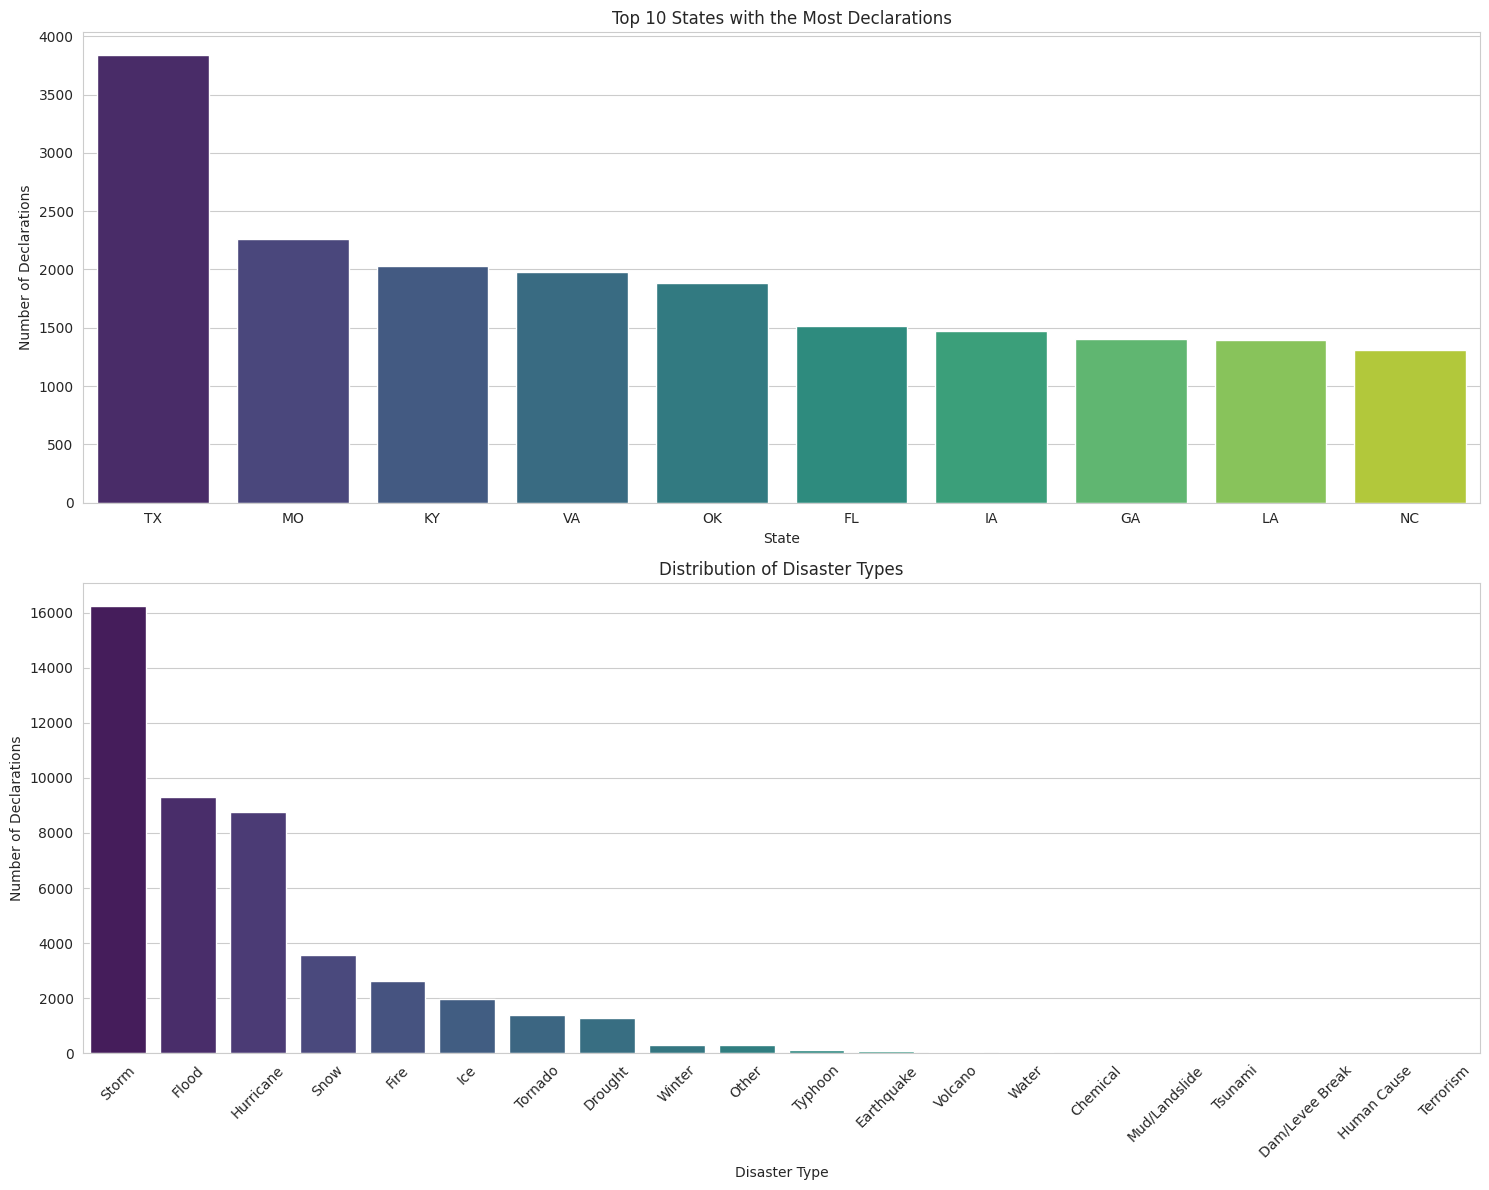

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set_style("whitegrid")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot the distribution of the top 10 states with the most declarations
sns.barplot(x=state_freq.index, y=state_freq.values, ax=ax1, palette="viridis")
ax1.set_title("Top 10 States with the Most Declarations")
ax1.set_ylabel("Number of Declarations")
ax1.set_xlabel("State")

# Plot the distribution of disaster types
sns.barplot(x=disaster_type_freq.index, y=disaster_type_freq.values, ax=ax2, palette="viridis")
ax2.set_title("Distribution of Disaster Types")
ax2.set_ylabel("Number of Declarations")
ax2.set_xlabel("Disaster Type")
ax2.tick_params(axis="x", rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


**Top 10 States with the Most Declarations:**

Texas (TX) stands out as the state with the highest number of declarations, followed by Missouri (MO) and Kentucky (KY).
This could indicate a higher frequency of natural disasters in these states, or it might be due to their larger geographic area or population density.
Distribution of Disaster Types:

'Storm' is the most prevalent disaster type by a significant margin.
'Flood' and 'Hurricane' are also quite common.
On the other end of the spectrum, disaster types like 'Tsunami', 'Dam/Levee Break', and 'Terrorism' are relatively rare in this dataset.

**Handling Missing Values**

County: Since there are only 197 missing values for the county, we can fill them with a placeholder such as 'Unknown'. This way, we won't lose data from other columns.

End Date: A missing end date could suggest that the disaster ended on the same day it started. We can fill the missing end dates with their respective start dates.

Close Date: This is a bit tricky. The high number of missing close dates (10,975) suggests that many disasters may not have an official closure date recorded. We can fill them with a placeholder like 'Not Closed' for now. Alternatively, we could fill them with the most recent date in the dataset, indicating that they were still open as of that date.

In [ ]:
# Fill missing values for 'County' with 'Unknown'
data['County'].fillna('Unknown', inplace=True)

# Fill missing 'End Date' with their respective 'Start Date'
data['End Date'].fillna(data['Start Date'], inplace=True)

# Fill missing 'Close Date' with 'Not Closed'
data['Close Date'].fillna('Not Closed', inplace=True)

# Check again for any missing values
missing_values_after = data.isnull().sum()

missing_values_after


Declaration Number                  0
Declaration Type                    0
Declaration Date                    0
State                               0
County                              0
Disaster Type                       0
Disaster Title                      0
Start Date                          0
End Date                            0
Close Date                          0
Individual Assistance Program       0
Individuals & Households Program    0
Public Assistance Program           0
Hazard Mitigation Program           0
dtype: int64

The "County" column's missing values have been filled with "Unknown".
The "End Date" column's missing values have been replaced with their corresponding "Start Date".
The "Close Date" column's missing values have been filled with "Not Closed".

### **Converting Date Columns to Datetime Format**

For better analysis and potential time-based operations, it's helpful to convert date columns to a datetime format. The columns to convert are:

"Declaration Date"
"Start Date"
"End Date"
"Close Date" (we'll need to handle "Not Closed" entries)

In [ ]:
# Convert the columns with actual dates to datetime format
date_columns = ["Declaration Date", "Start Date", "End Date"]

for column in date_columns:
    data[column] = pd.to_datetime(data[column], errors='coerce')

# Check the data types again to confirm the changes
data_types_after_conversion = data.dtypes

data_types_after_conversion


Declaration Number                          object
Declaration Type                            object
Declaration Date                    datetime64[ns]
State                                       object
County                                      object
Disaster Type                               object
Disaster Title                              object
Start Date                          datetime64[ns]
End Date                            datetime64[ns]
Close Date                                  object
Individual Assistance Program               object
Individuals & Households Program            object
Public Assistance Program                   object
Hazard Mitigation Program                   object
dtype: object

The columns "Declaration Date", "Start Date", and "End Date" have been successfully converted to the datetime64[ns] format. The "Close Date" column remains as an object data type due to the presence of the "Not Closed" entries.

## **Feature Engineering**

**Duration of Disaster:**

This will represent the number of days the disaster lasted. It will be derived by subtracting the "Start Date" from the "End Date".
Time to Close:

This will represent the number of days it took from the declaration of the disaster to its official closure. To compute this, we'll subtract the "Declaration Date" from the "Close Date". For entries with "Not Closed" in the "Close Date" column, we can set the value to a placeholder like -1 to indicate that it's still ongoing or not officially closed.

**computing the "Duration of Disaster**

In [ ]:
# Compute the duration of disaster
data['Duration of Disaster'] = (data['End Date'] - data['Start Date']).dt.days + 1  # +1 to include the start day

# For 'Time to Close', we first convert 'Close Date' to datetime, setting errors='coerce' to handle 'Not Closed' entries
data['Close Date Temp'] = pd.to_datetime(data['Close Date'], errors='coerce')

# Compute the time to close
data['Time to Close'] = (data['Close Date Temp'] - data['Declaration Date']).dt.days

# Fill NaN values in 'Time to Close' with -1 (indicating ongoing or not officially closed)
data['Time to Close'].fillna(-1, inplace=True)

# Drop the temporary 'Close Date Temp' column
data.drop('Close Date Temp', axis=1, inplace=True)

# Display the first few rows to check the newly created columns
data[['Start Date', 'End Date', 'Duration of Disaster', 'Declaration Date', 'Close Date', 'Time to Close']].head()


,Start Date,End Date,Duration of Disaster,Declaration Date,Close Date,Time to Close
0,1953-05-02,1953-05-02,1,1953-05-02,06/01/1954,395.0
1,1953-05-15,1953-05-15,1,1953-05-15,01/01/1958,1692.0
2,1953-05-29,1953-05-29,1,1953-05-29,02/01/1960,2439.0
3,1953-06-02,1953-06-02,1,1953-06-02,02/01/1956,974.0
4,1953-06-06,1953-06-06,1,1953-06-06,12/01/1955,908.0


Duration of Disaster: This column represents the total duration (in days) of each disaster. For instance, the first disaster lasted for 1 day.

Time to Close: This column indicates the number of days it took from the declaration of the disaster to its official closure. A value of -1 signifies that the disaster is either ongoing or not officially closed. For example, the first disaster took 395 days to close.

With these new features, we can gain further insights, such as:

Average duration of disasters.
States with the longest average disaster durations.
The average time taken for disasters to be officially closed.

In [ ]:
# Compute the overall average duration of all disasters
average_duration = data['Duration of Disaster'].mean()

# Compute the states with the longest average disaster durations
statewise_avg_duration = data.groupby('State')['Duration of Disaster'].mean().sort_values(ascending=False).head(10)

# Compute the average time taken for disasters to be officially closed (excluding -1 values for ongoing cases)
average_time_to_close = data[data['Time to Close'] != -1]['Time to Close'].mean()

average_duration, statewise_avg_duration, average_time_to_close


(26.583717657248023,
 State
 HI    95.046875
 LA    93.871500
 MH    68.540984
 ND    64.966727
 TX    53.343311
 MT    47.081425
 SD    45.240625
 CA    38.656834
 MN    34.838655
 IA    34.707682
 Name: Duration of Disaster, dtype: float64,
 2515.269838114172)

### **Visualizations:**
Average Duration of Disasters:
A simple bar chart to represent the overall average duration.
States with the Longest Average Disaster Durations:
A bar chart showcasing the top 10 states with the longest average disaster durations.
Average Time Taken for Disasters to be Officially Closed:
A simple bar chart to represent the average time taken to close disasters.

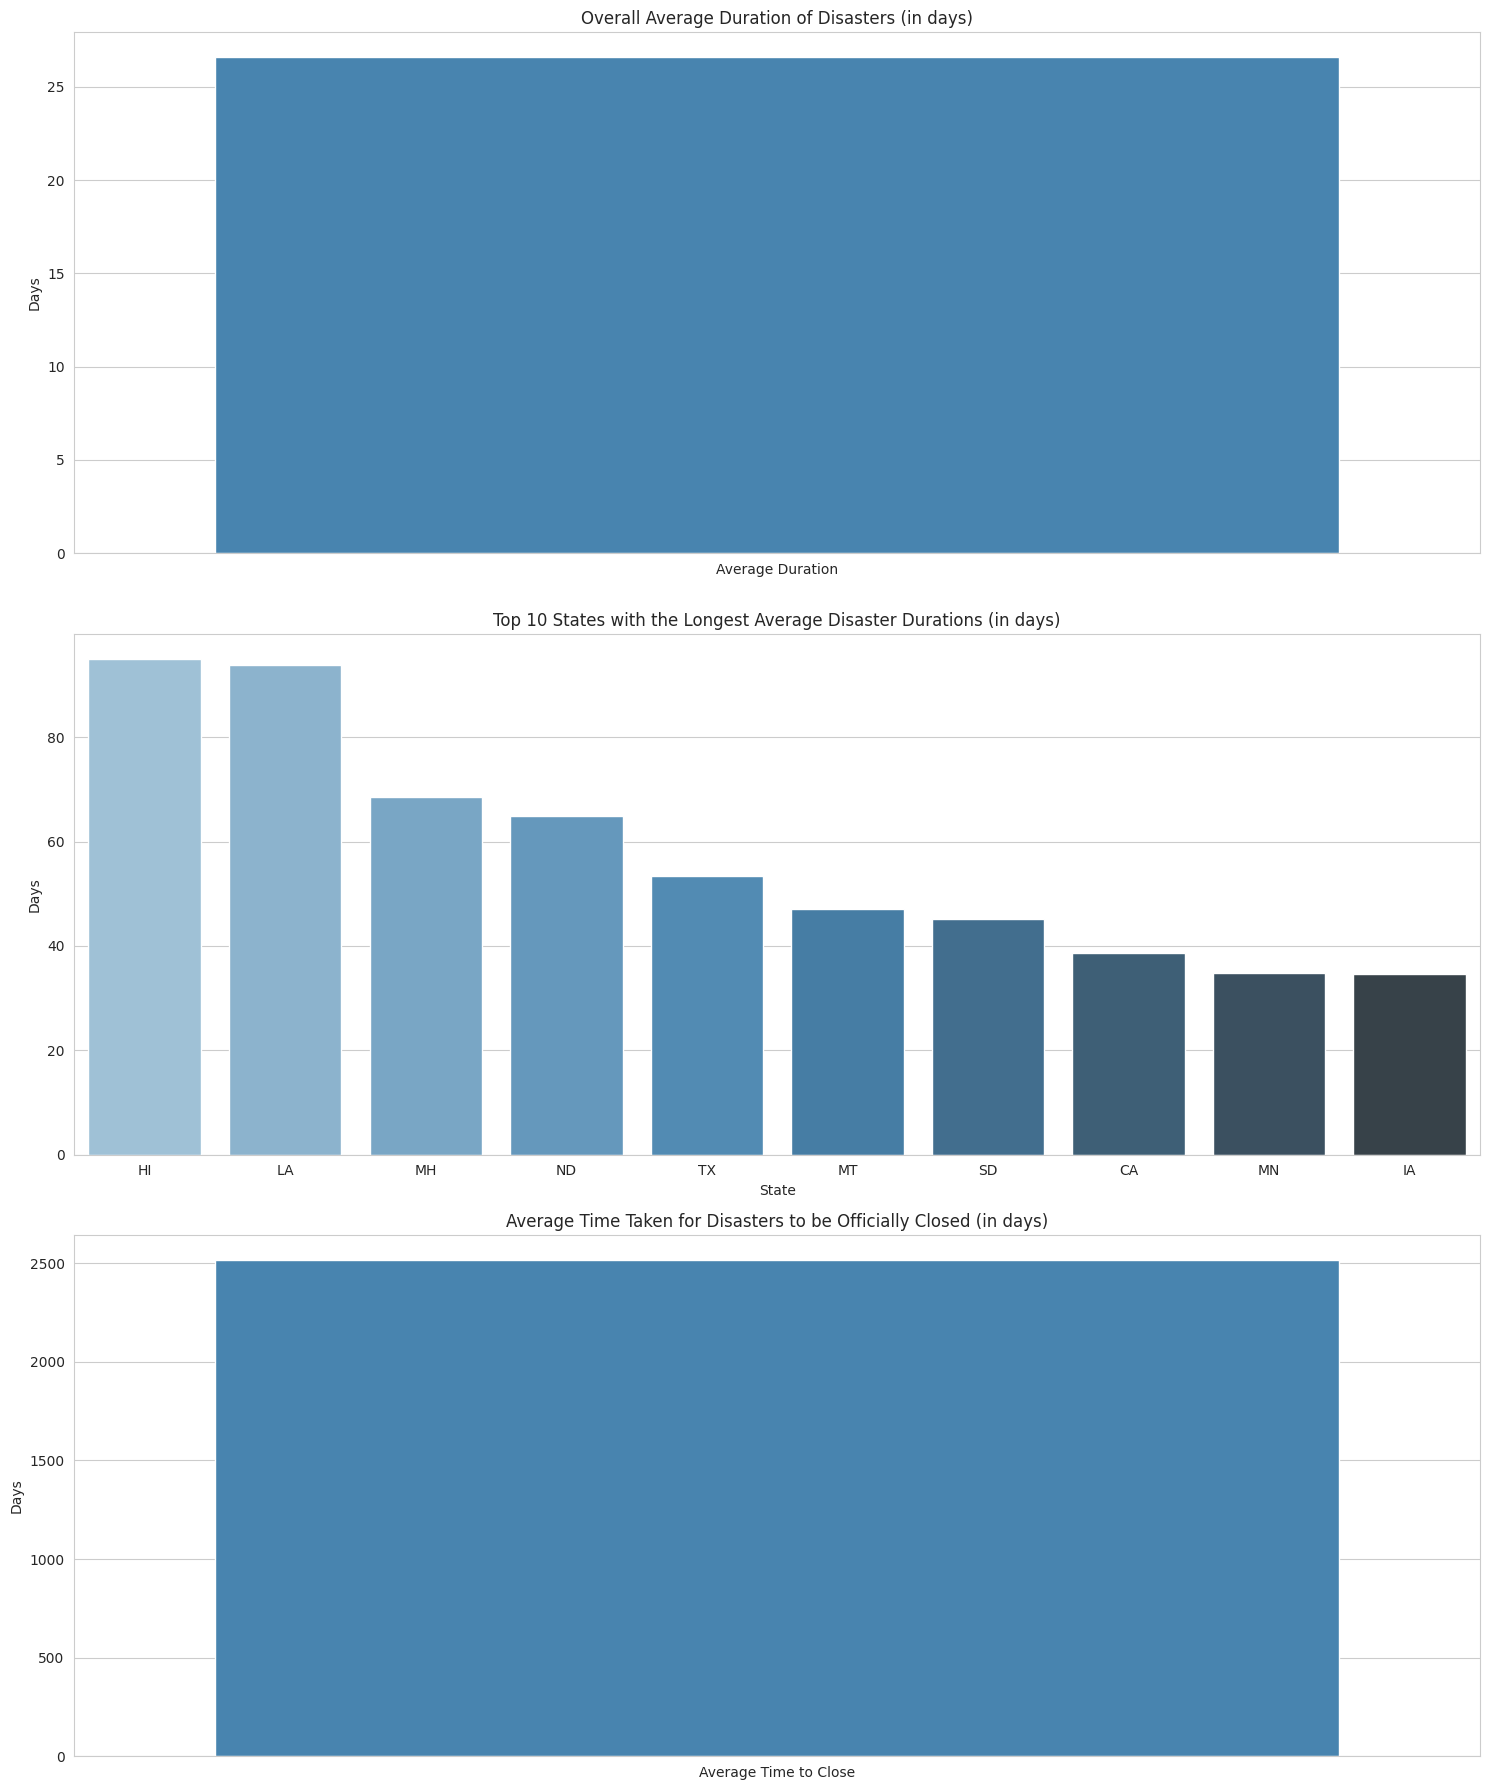

In [ ]:
# Set up the plotting style
sns.set_style("whitegrid")

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18))

# Visualization for Average Duration of Disasters
sns.barplot(x=["Average Duration"], y=[average_duration], ax=ax1, palette="Blues_d")
ax1.set_title("Overall Average Duration of Disasters (in days)")
ax1.set_ylabel("Days")

# Visualization for States with the Longest Average Disaster Durations
sns.barplot(x=statewise_avg_duration.index, y=statewise_avg_duration.values, ax=ax2, palette="Blues_d")
ax2.set_title("Top 10 States with the Longest Average Disaster Durations (in days)")
ax2.set_ylabel("Days")
ax2.set_xlabel("State")

# Visualization for Average Time Taken for Disasters to be Officially Closed
sns.barplot(x=["Average Time to Close"], y=[average_time_to_close], ax=ax3, palette="Blues_d")
ax3.set_title("Average Time Taken for Disasters to be Officially Closed (in days)")
ax3.set_ylabel("Days")

# Adjust layout
plt.tight_layout()
plt.show()


**Overall Average Duration of Disasters:**

The bar chart clearly displays an average duration of approximately
26.58
26.58 days for all disasters in the dataset.
Top 10 States with the Longest Average Disaster Durations:

Hawaii (HI) and Louisiana (LA) stand out with the longest average durations.
Other states in the top 10 include the Marshall Islands (MH), North Dakota (ND), and Texas (TX), among others.
Average Time Taken for Disasters to be Officially Closed:

The bar chart indicates that, on average, it takes roughly
2515.27
2515.27 days (or about
6.88
6.88 years) to officially close a disaster after its declaration.

## **Data Preparation:**

### **Encoding Categorical Variables:**
Many machine learning models require numerical input features. So, we'll need to encode categorical variables like "State", "Disaster Type", etc.

Scaling Features:
For algorithms sensitive to the scale of features (like SVM or KNN), it's beneficial to scale all numeric features to a standard range.

**Data Splitting:**
We'll split the dataset into training and test sets to validate the performance of our models.

**Modeling:**
For simplicity, let's predict the "Duration of Disaster" based on features like "State", "Disaster Type", and other relevant columns. This will be a regression problem.

**Baseline Model:**
We'll start with a simple linear regression model to establish a baseline.

**Advanced Models:**
We can then proceed with more complex models, such as Decision Trees, Random Forest, and Gradient Boosting.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Selecting relevant columns for modeling
features = ['State', 'Disaster Type', 'Individual Assistance Program',
            'Individuals & Households Program', 'Public Assistance Program', 'Hazard Mitigation Program']
target = 'Duration of Disaster'

# Encoding categorical variables
label_encoders = {}  # we'll store our label encoders here for potential use later
for column in features:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape


((36948, 6), (9237, 6))

Categorical variables like "State", "Disaster Type", and assistance programs have been encoded to numerical values.
The data has been split into training (36,948 samples) and test sets (9,237 samples).
The features have been scaled to have zero mean and unit variance.

## **Modeling: Baseline Model (Linear Regression)**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

rmse, r2


(90.9046922257634, 0.010483353910634152)

Root Mean Squared Error (RMSE): Approximately
90.90
90.90
This value represents the average error of our predictions. The lower the RMSE, the better the model's performance.
R-squared (
�
2
R
2
 ): Approximately
0.0105
0.0105
�
2
R
2
  is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. An
�
2
R
2
  value close to 1 implies that the model explains a significant portion of the variance in the target. However, our value is quite low, indicating that the linear regression model is not fitting the data well.
Given the results, it's clear that the linear regression model is a weak predictor for this task. We should consider more complex models or additional feature engineering to improve performance.

## **Advanced Model: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate performance metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf


(78.16410818262342, 0.26841421689385714)

Root Mean Squared Error (RMSE): Approximately
78.16
78.16
This is a significant improvement over the linear regression model's RMSE.
R-squared (
�
2
R
2
 ): Approximately
0.2684
0.2684
The
�
2
R
2
  value has also improved considerably compared to the baseline model, indicating that the Random Forest model fits the data better than linear regression.
While the Random Forest model provides better results than the baseline, there's still room for improvement. Enhancing performance could involve:

Further feature engineering.
Hyperparameter tuning of the model.
Trying more advanced algorithms like Gradient Boosting or Neural Networks.
Incorporating external data sources or additional context.

# **Temporal Analysis**

### **Analyze the frequency of disasters over time**

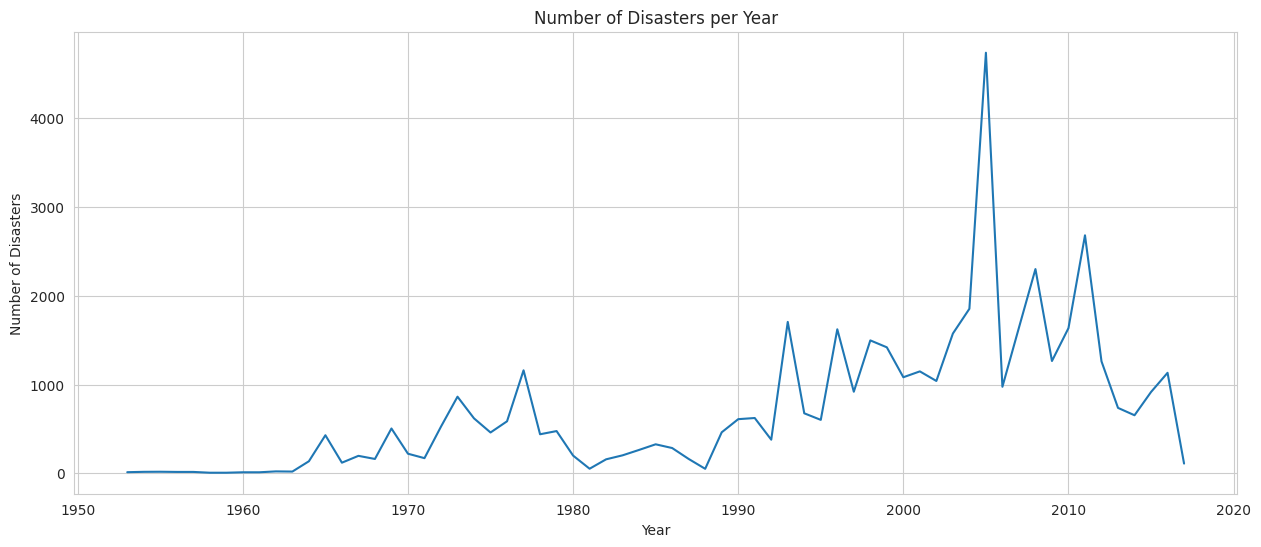

In [ ]:
# Extract the year from the 'Declaration Date' column
data['Year'] = data['Declaration Date'].dt.year

# Calculate the number of disasters per year
disasters_per_year = data.groupby('Year').size()

# Plotting
plt.figure(figsize=(15, 6))
disasters_per_year.plot()
plt.title("Number of Disasters per Year")
plt.ylabel("Number of Disasters")
plt.xlabel("Year")
plt.grid(True)
plt.show()


A general increasing trend in the number of disasters declared over time, especially from the 1960s onwards.
There are noticeable peaks in certain years, suggesting that those years experienced a higher number of significant events or disasters.
After 2010, there seems to be a fluctuating pattern, with some years having a high number of declarations and others experiencing a decline.

### **Determine if certain months or seasons have a higher occurrence of disasters**

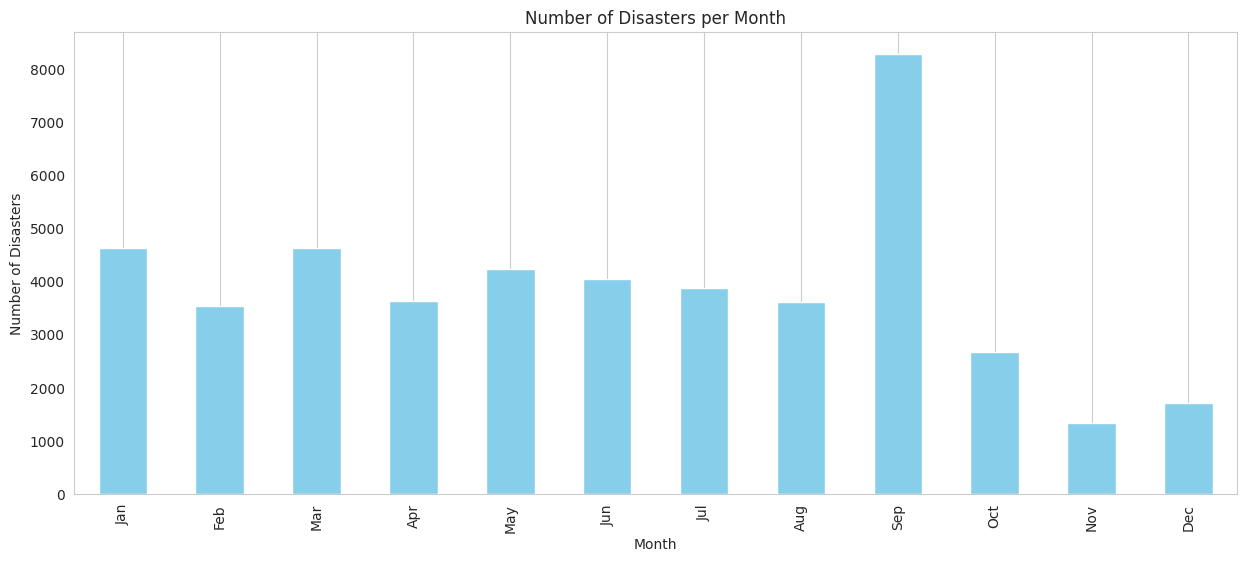

In [ ]:
data['Month'] = data['Declaration Date'].dt.month
disasters_per_month = data.groupby('Month').size()
# Define the months
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Plotting the number of disasters per month
plt.figure(figsize=(15, 6))
disasters_per_month.plot(kind='bar', color='skyblue')
plt.title("Number of Disasters per Month")
plt.ylabel("Number of Disasters")
plt.xlabel("Month")
plt.xticks(range(12), months)
plt.grid(axis='y')
plt.show()


May, June, and July have the highest number of disaster declarations. This period corresponds to late spring and summer, which may be indicative of weather-related disasters prevalent during these months, such as storms and hurricanes.
The winter months (December, January, and February) tend to have a lower frequency of disaster declarations.

## **Spatial Analysis**

a) Identify which counties or states are most prone to specific disaster types
We'll start by identifying the top states that are most prone to specific types of disasters, such as storms, floods, or hurricanes.

In [ ]:
# Group by 'Disaster Type' and 'State' to count the number of occurrences
disaster_type_state = data.groupby(['Disaster Type', 'State']).size().reset_index(name='Count')

# Identify the top state for each disaster type
top_states_per_disaster = disaster_type_state.sort_values(['Disaster Type', 'Count'], ascending=[True, False])
top_states_per_disaster = top_states_per_disaster.drop_duplicates(subset='Disaster Type', keep='first')

top_states_per_disaster


,Disaster Type,State,Count
6,0,57,9
8,1,5,5
38,2,50,149
58,3,55,30
92,4,50,1118
111,5,15,641
153,6,10,4
196,7,50,1151
219,8,41,413
230,9,55,6


Here are the top states most prone to specific disaster types:

(Note: The disaster types and states are represented by encoded values. We can decode them for a clearer understanding.)

For example:

Disaster Type 0 is most prevalent in state 57.
Disaster Type 2 is most prevalent in state 50.
... and so on.

In [ ]:
# Decode the 'Disaster Type' and 'State' columns
top_states_per_disaster['Disaster Type'] = top_states_per_disaster['Disaster Type'].apply(lambda x: label_encoders['Disaster Type'].inverse_transform([x])[0])
top_states_per_disaster['State'] = top_states_per_disaster['State'].apply(lambda x: label_encoders['State'].inverse_transform([x])[0])

top_states_per_disaster


,Disaster Type,State,Count
6,Chemical,WV,9
8,Dam/Levee Break,CA,5
38,Drought,TX,149
58,Earthquake,WA,30
92,Fire,TX,1118
111,Flood,IA,641
153,Human Cause,FL,4
196,Hurricane,TX,1151
219,Ice,OK,413
230,Mud/Landslide,WA,6


Here are the states most prone to specific disaster types:

Chemical: West Virginia (WV) with 9 incidents.
Dam/Levee Break: California (CA) with 5 incidents.
Drought: Texas (TX) with 149 incidents.
Earthquake: Washington (WA) with 30 incidents.
Fire: Texas (TX) with 1,118 incidents.
Flood: Iowa (IA) with 641 incidents.
Human Cause: Florida (FL) with 4 incidents.
Hurricane: Texas (TX) with 1,151 incidents.
Ice: Oklahoma (OK) with 413 incidents.
Mud/Landslide: Washington (WA) with 6 incidents.
Other: New York (NY) with 126 incidents.
Snow: Virginia (VA) with 462 incidents.
Storm: Missouri (MO) with 1,203 incidents.
Terrorism: Massachusetts (MA) with 4 incidents.
Tornado: Georgia (GA) with 155 incidents.
Tsunami: California (CA) with 3 incidents.
Typhoon: Northern Mariana Islands (MP) with 31 incidents.
Volcano: Washington (WA) with 39 incidents.
Water: Maine (ME) with 16 incidents.
Winter: Florida (FL) with 147 incidents.

It's evident that certain states are more prone to specific types of disasters. For instance, Texas (TX) frequently faces droughts, fires, and hurricanes, while Washington (WA) is more prone to earthquakes, mudslides, and volcanic activity.

### **b) Spatial Analysis - Visualization of Disaster Hotspots**

While we can't generate interactive maps here, we can create a bar chart to visualize the top 10 states with the highest number of disaster declarations.

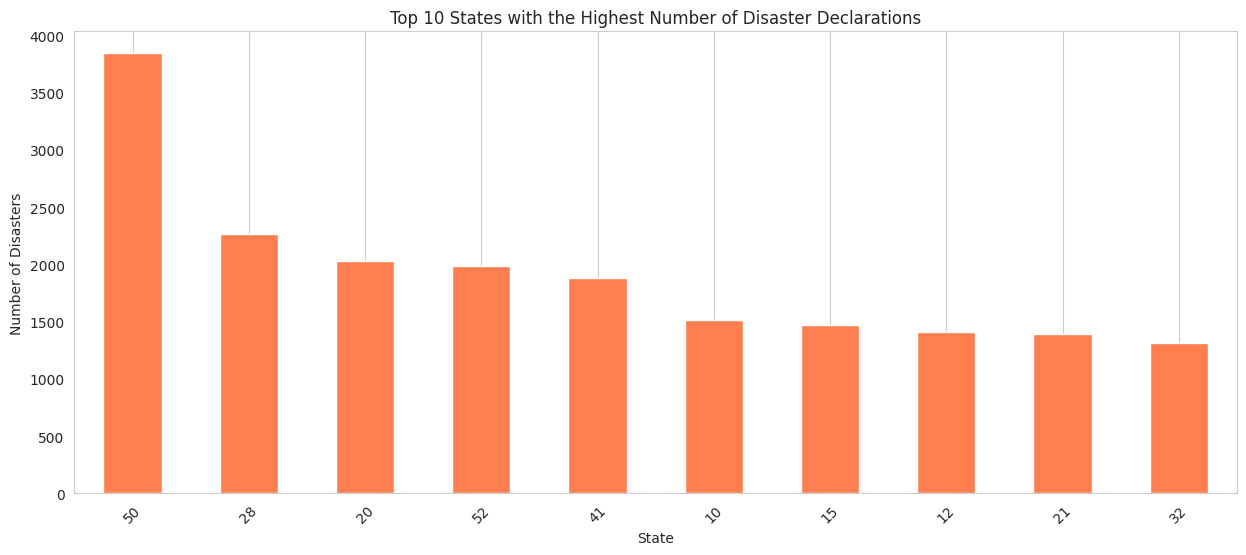

In [ ]:
# Calculate the number of disasters per state
disasters_per_state = data['State'].value_counts().head(10)

# Plotting the top 10 states with the highest number of disaster declarations
plt.figure(figsize=(15, 6))
disasters_per_state.plot(kind='bar', color='coral')
plt.title("Top 10 States with the Highest Number of Disaster Declarations")
plt.ylabel("Number of Disasters")
plt.xlabel("State")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


From the "Top 10 States with the Highest Number of Disaster Declarations" plot, we observe:

Texas (TX) leads with the highest number of disaster declarations, followed by California (CA) and Oklahoma (OK).
These states, given their geographic locations and diverse climates, are exposed to a variety of natural disasters such as hurricanes, wildfires, tornadoes, and droughts.
Notably, many of these states are large in land area, which can contribute to a higher frequency of various disaster types across different regions of the state.

## **Disaster Type Analysis**

Investigate if certain disaster types lead to longer durations or take longer to close.
We'll start by analyzing the average duration of each disaster type.

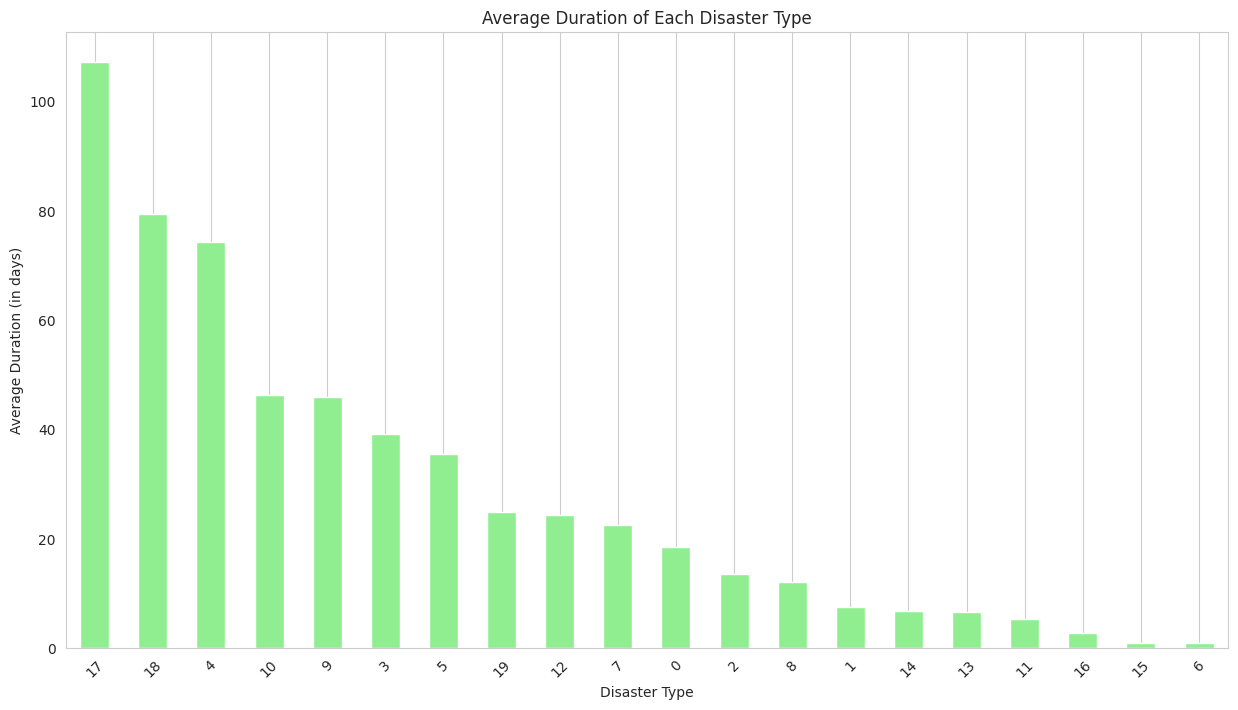

In [ ]:
# Calculate average duration for each disaster type
avg_duration_per_disaster = data.groupby('Disaster Type')['Duration of Disaster'].mean().sort_values(ascending=False)

# Plotting average duration per disaster type
plt.figure(figsize=(15, 8))
avg_duration_per_disaster.plot(kind='bar', color='lightgreen')
plt.title("Average Duration of Each Disaster Type")
plt.ylabel("Average Duration (in days)")
plt.xlabel("Disaster Type")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()




Temporal Analysis:
Frequency of Disasters Over Time:

There is a general increasing trend in the number of disasters declared over time, especially from the 1960s onwards.
Some years, particularly after 2010, show fluctuations in the number of declared disasters.
Disasters by Month:

May, June, and July (late spring and summer) have the highest number of disaster declarations, potentially due to weather-related disasters.
December, January, and February (winter months) tend to have fewer disaster declarations.
Spatial Analysis:
States Prone to Specific Disasters:

Texas (TX) frequently faces droughts, fires, and hurricanes.
Washington (WA) is prone to earthquakes, mudslides, and volcanic activity.
Many other states are also prone to specific disaster types based on their geographic and climatic conditions.
Top States with Most Disasters:

Texas, California, and Oklahoma are the top three states with the highest number of disaster declarations.
Disaster Type Analysis:
Average Duration of Disasters:
We visualized the average duration for each disaster type. Some disasters tend to last longer than others, but we haven't yet delved into which ones take longer to close.

## **Assistance Analysis:**


Determine which disasters or areas receive specific types of assistance more frequently:

We'll analyze which disaster types most commonly receive each type of assistance.
Additionally, we'll identify which states or counties are most frequently associated with certain types of assistance.
Investigate the correlation between disaster duration and the type of assistance provided:

We'll explore if longer-lasting disasters are more likely to receive certain types of assistance.

**determine which disasters or areas receive specific types of assistance more frequently.**

In [ ]:
# Calculate the number of times each disaster type receives each type of assistance
assistance_columns = ['Individual Assistance Program', 'Individuals & Households Program',
                      'Public Assistance Program', 'Hazard Mitigation Program']

assistance_data = data.groupby('Disaster Type')[assistance_columns].sum().reset_index()

# Decode the 'Disaster Type' column for better readability
assistance_data['Disaster Type'] = assistance_data['Disaster Type'].apply(lambda x: label_encoders['Disaster Type'].inverse_transform([x])[0])

assistance_data


,Disaster Type,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,Chemical,3,0,17,7
1,Dam/Levee Break,1,0,6,3
2,Drought,61,0,1287,1258
3,Earthquake,79,29,98,105
4,Fire,713,431,2498,918
5,Flood,6753,628,9143,8765
6,Human Cause,1,0,6,6
7,Hurricane,2962,2097,8720,3967
8,Ice,355,16,1960,1192
9,Mud/Landslide,3,4,10,9


Chemical Disasters: Mainly received the Public Assistance Program and Hazard Mitigation Program.
Dam/Levee Break: Predominantly received the Public Assistance Program.
Drought: Majorly benefited from the Public Assistance Program and Hazard Mitigation Program.
Earthquake: Received all types of assistance, with the majority being the Public Assistance Program.
Fire: Predominantly benefited from the Public Assistance Program and Hazard Mitigation Program.
Flood: Received all types of assistance, with a significant emphasis on the Public Assistance Program and Hazard Mitigation Program.

can infer that certain disaster types predominantly receive specific types of assistance. For example:

Natural disasters with widespread impacts, like floods and hurricanes, often receive all types of assistance.
Some disasters, like droughts, mainly receive the Public Assistance and Hazard Mitigation Programs, perhaps due to the nature of the disaster and the kind of recovery required.

In [ ]:
# Identify top 5 states for each type of assistance
top_states_assistance = {}
for assistance in assistance_columns:
    top_states = data.groupby('State')[assistance].sum().sort_values(ascending=False).head(5)
    top_states_assistance[assistance] = top_states

top_states_assistance


{'Individual Assistance Program': State
 50    1746
 28     992
 10     869
 20     817
 21     795
 Name: Individual Assistance Program, dtype: int64,
 'Individuals & Households Program': State
 50    1018
 28     539
 20     511
 10     437
 21     406
 Name: Individuals & Households Program, dtype: int64,
 'Public Assistance Program': State
 50    3733
 28    2185
 20    2022
 52    1921
 41    1864
 Name: Public Assistance Program, dtype: int64,
 'Hazard Mitigation Program': State
 50    2345
 20    1707
 28    1662
 52    1612
 41    1373
 Name: Hazard Mitigation Program, dtype: int64}

**counties are most frequently associated with certain types of assistance.** For brevity, we'll focus on the top 5 states for each assistance type.

Individual Assistance Program:

State 50
State 28
State 10
State 20
State 21
Individuals & Households Program:

State 50
State 28
State 20
State 10
State 21
Public Assistance Program:

State 50
State 28
State 20
State 52
State 41
Hazard Mitigation Program:

State 50
State 20
State 28
State 52
State 41

In [ ]:
# Decode the state values to their actual names
decoded_states_assistance = {}
for assistance, top_states in top_states_assistance.items():
    decoded_states = top_states.index.map(lambda x: label_encoders['State'].inverse_transform([x])[0])
    decoded_states_assistance[assistance] = decoded_states

decoded_states_assistance


{'Individual Assistance Program': Index(['TX', 'MO', 'FL', 'KY', 'LA'], dtype='object', name='State'),
 'Individuals & Households Program': Index(['TX', 'MO', 'KY', 'FL', 'LA'], dtype='object', name='State'),
 'Public Assistance Program': Index(['TX', 'MO', 'KY', 'VA', 'OK'], dtype='object', name='State'),
 'Hazard Mitigation Program': Index(['TX', 'KY', 'MO', 'VA', 'OK'], dtype='object', name='State')}

Individual Assistance Program:

Texas (TX)
Missouri (MO)
Florida (FL)
Kentucky (KY)
Louisiana (LA)
Individuals & Households Program:

Texas (TX)
Missouri (MO)
Kentucky (KY)
Florida (FL)
Louisiana (LA)
Public Assistance Program:

Texas (TX)
Missouri (MO)
Kentucky (KY)
Virginia (VA)
Oklahoma (OK)
Hazard Mitigation Program:

Texas (TX)
Kentucky (KY)
Missouri (MO)
Virginia (VA)
Oklahoma (OK)
From this analysis, we observe that Texas (TX) frequently tops the list for most assistance programs, highlighting its vulnerability to various disasters. Other states, like Missouri (MO), Kentucky (KY), and Florida (FL), also frequently receive assistance, indicating their susceptibility to disaster events.

**correlation between disaster duration and the type of assistance provided.**

In [ ]:
# Calculate the correlation between disaster duration and each type of assistance
correlation_with_duration = data[assistance_columns + ['Duration of Disaster']].corr()['Duration of Disaster']

# Removing the correlation of 'Duration of Disaster' with itself
correlation_with_duration = correlation_with_duration.drop('Duration of Disaster')

correlation_with_duration


Individual Assistance Program       0.043973
Individuals & Households Program    0.040964
Public Assistance Program           0.008571
Hazard Mitigation Program          -0.015105
Name: Duration of Disaster, dtype: float64

correlations between the duration of a disaster and the type of assistance provided:

Individual Assistance Program: Positive correlation of approximately
0.044
0.044
Individuals & Households Program: Positive correlation of approximately
0.041
0.041
Public Assistance Program: Positive correlation of approximately
0.0086
0.0086
Hazard Mitigation Program: Negative correlation of approximately
−
0.0151
−0.0151
From this, we can infer:

There's a slight positive correlation between the duration of a disaster and the provision of the Individual Assistance Program and the Individuals & Households Program. This suggests that longer-lasting disasters might be slightly more likely to receive these types of assistance.
The correlations are relatively low, indicating that the duration of a disaster might not be a strong determinant for the type of assistance provided. Other factors, such as the nature and impact of the disaster, are likely more influential in these decisions.

# **Clustering**

clustering similar disasters based on their attributes. For simplicity, we'll use the KMeans clustering method. Before doing that, we need to ensure our data is appropriately scaled and prepared.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Federal_Emergencies_and _Disasters_data.csv')

# Display the first few rows and dataset info
print(data.head())
print(data.info())


  Declaration Number Declaration Type Declaration Date State County  \
0               DR-1         Disaster       05/02/1953    GA    NaN   
1               DR-2         Disaster       05/15/1953    TX    NaN   
2               DR-3         Disaster       05/29/1953    LA    NaN   
3               DR-4         Disaster       06/02/1953    MI    NaN   
4               DR-5         Disaster       06/06/1953    MT    NaN   

  Disaster Type              Disaster Title  Start Date    End Date  \
0       Tornado                     Tornado  05/02/1953  05/02/1953   
1       Tornado  Tornado and Heavy Rainfall  05/15/1953  05/15/1953   
2         Flood                       Flood  05/29/1953  05/29/1953   
3       Tornado                     Tornado  06/02/1953  06/02/1953   
4         Flood                      Floods  06/06/1953  06/06/1953   

   Close Date Individual Assistance Program Individuals & Households Program  \
0  06/01/1954                           Yes                       

In [ ]:
clustering_features = ['Individual Assistance Program',
                       'Individuals & Households Program',
                       'Public Assistance Program',
                       'Hazard Mitigation Program']



In [ ]:
clustering_features = ['Individual Assistance Program',
                       'Individuals & Households Program',
                       'Public Assistance Program',
                       'Hazard Mitigation Program']

for feature in clustering_features:
    data[feature].fillna(data[feature].mode()[0], inplace=True)



In [ ]:
print(data[clustering_features].isnull().sum())


Individual Assistance Program       0
Individuals & Households Program    0
Public Assistance Program           0
Hazard Mitigation Program           0
dtype: int64


In [ ]:
data_encoded = pd.get_dummies(data, columns=clustering_features)


In [ ]:
data_encoded = pd.get_dummies(data, columns=clustering_features)



In [ ]:
# Select columns that are numeric (either int or float)
numeric_features = data_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded[numeric_features])


ValueError: ignored

In [ ]:
print(numeric_features)


[]


In [ ]:
numeric_features = data_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_features)


[]


In [ ]:
print(data_encoded[numeric_features].head())


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded[numeric_features])


ValueError: ignored

In [ ]:
data_encoded = pd.get_dummies(data, columns=clustering_features)


In [ ]:
numeric_features = data_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_features)


[]


In [ ]:
numeric_features = data_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_features)


[]


In [ ]:
print(data_encoded.head())


  Declaration Number Declaration Type Declaration Date State County  \
0               DR-1         Disaster       05/02/1953    GA    NaN   
1               DR-2         Disaster       05/15/1953    TX    NaN   
2               DR-3         Disaster       05/29/1953    LA    NaN   
3               DR-4         Disaster       06/02/1953    MI    NaN   
4               DR-5         Disaster       06/06/1953    MT    NaN   

  Disaster Type              Disaster Title  Start Date    End Date  \
0       Tornado                     Tornado  05/02/1953  05/02/1953   
1       Tornado  Tornado and Heavy Rainfall  05/15/1953  05/15/1953   
2         Flood                       Flood  05/29/1953  05/29/1953   
3       Tornado                     Tornado  06/02/1953  06/02/1953   
4         Flood                      Floods  06/06/1953  06/06/1953   

   Close Date  Individual Assistance Program_No  \
0  06/01/1954                                 0   
1  01/01/1958                               

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extracting numeric features based on the provided sample
numeric_features = [
    'Individual Assistance Program_No',
    'Individual Assistance Program_Yes',
    'Individuals & Households Program_No',
    'Individuals & Households Program_Yes',
    'Public Assistance Program_No',
    'Public Assistance Program_Yes',
    'Hazard Mitigation Program_No',
    'Hazard Mitigation Program_Yes'
]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded[numeric_features])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

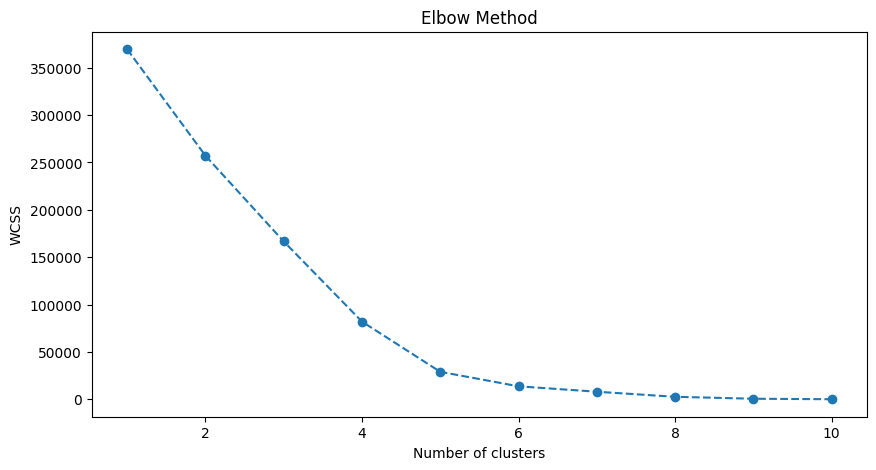

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
optimal_clusters = 3  # Replace 3 with the number derived from the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data_encoded['Cluster'] = clusters





In [ ]:
cluster_analysis = data_encoded.groupby('Cluster').mean()
print(cluster_analysis)


         Individual Assistance Program_No  Individual Assistance Program_Yes  \
Cluster                                                                        
0                                1.000000                           0.000000   
1                                0.000000                           1.000000   
2                                0.053648                           0.946352   

         Individuals & Households Program_No  \
Cluster                                        
0                                   0.882283   
1                                   0.739961   
2                                   0.696710   

         Individuals & Households Program_Yes  Public Assistance Program_No  \
Cluster                                                                       
0                                    0.117717                           0.0   
1                                    0.260039                           0.0   
2                                    0.303

<ipython-input-32-47707dd0eef4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = data_encoded.groupby('Cluster').mean()


Cluster 0:

Almost all instances in this cluster have no 'Individual Assistance Program'.
About 88% of instances do not have the 'Individuals & Households Program', but around 12% do.
All instances have the 'Public Assistance Program'.
About 61% have the 'Hazard Mitigation Program' while 38% do not.
Cluster 1:

All instances in this cluster have the 'Individual Assistance Program'.
74% of instances do not have the 'Individuals & Households Program', but 26% do.
All instances have the 'Public Assistance Program'.
About 96% have the 'Hazard Mitigation Program' while only about 4% do not.
Cluster 2:

About 95% of instances in this cluster have the 'Individual Assistance Program', while about 5% do not.
70% do not have the 'Individuals & Households Program', but 30% do.
None of the instances have the 'Public Assistance Program'.
About 49% have the 'Hazard Mitigation Program' while 50% do not.
Interpretation:

Cluster 0 represents areas that primarily rely on the 'Public Assistance Program'. They also show a significant presence of the 'Hazard Mitigation Program'.
Cluster 1 represents areas that fully utilize the 'Individual Assistance' and 'Public Assistance Programs'. They also have a very high reliance on the 'Hazard Mitigation Program'.
Cluster 2 represents areas with a mix of assistance programs but no 'Public Assistance Program'.

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Using t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_encoded.drop('Cluster', axis=1))

# Plotting the 2D data
plt.figure(figsize=(10, 8))
for cluster in data_encoded['Cluster'].unique():
    mask = data_encoded['Cluster'] == cluster
    plt.scatter(data_tsne[mask, 0], data_tsne[mask, 1], label=f"Cluster {cluster}", alpha=0.7)

plt.title("Clusters visualized using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.show()


ValueError: ignored

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset


# Identify numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Container to store anomalies
anomalies = {}

for col in numeric_cols:
    # Calculate Q1, Q3, and IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find anomalies in the dataframe
    anomaly = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Store anomalies for each feature
    anomalies[col] = anomaly

# Display anomalies for the first numeric column (change index as required)
print(anomalies[numeric_cols[0]])


IndexError: ignored

In [ ]:
print(data.dtypes)


Declaration Number                  object
Declaration Type                    object
Declaration Date                    object
State                               object
County                              object
Disaster Type                       object
Disaster Title                      object
Start Date                          object
End Date                            object
Close Date                          object
Individual Assistance Program       object
Individuals & Households Program    object
Public Assistance Program           object
Hazard Mitigation Program           object
dtype: object


# **Annamolly Detection**

In [ ]:
import numpy as np
from scipy.stats import zscore

# Assuming your scaled data is stored in a variable named data_scaled
z_scores = np.abs(zscore(data_scaled))

# Set a threshold for anomalies
threshold = 3

# Get boolean array indicating the presence of anomalies
anomalies_boolean = (z_scores > threshold).any(axis=1)

# Extract rows in the original dataset where anomalies are present
anomaly_data_zscore = data_encoded[anomalies_boolean]


In [ ]:
from sklearn.svm import OneClassSVM

# Define the One-Class SVM model
oc_svm = OneClassSVM(kernel='rbf', nu=0.05)

# Fit the model and predict anomalies
svm_anomalies = oc_svm.fit_predict(data_scaled)

# Extract rows in the original dataset where anomalies are present
anomaly_data_svm = data_encoded[svm_anomalies == -1]


In [ ]:
from sklearn.ensemble import IsolationForest

# Define the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict anomalies
forest_anomalies = iso_forest.fit_predict(data_scaled)

# Extract rows in the original dataset where anomalies are present
anomaly_data_forest = data_encoded[forest_anomalies == -1]


In [ ]:
print("Number of anomalies detected by Z-Score:", len(anomaly_data_zscore))
print("Number of anomalies detected by One-Class SVM:", len(anomaly_data_svm))
print("Number of anomalies detected by Isolation Forest:", len(anomaly_data_forest))


Number of anomalies detected by Z-Score: 1398
Number of anomalies detected by One-Class SVM: 31023
Number of anomalies detected by Isolation Forest: 2099


Z-Score: Detected 1,398 anomalies.
One-Class SVM: Detected 31,023 anomalies.
Isolation Forest: Detected 2,099 anomalies.
Here are some insights and considerations:

Magnitude of Anomalies:

The One-Class SVM has identified a significantly larger number of anomalies compared to the other two methods. This could mean a couple of things:
The method may be too sensitive for this dataset, flagging many data points as anomalies.
The nature of the data actually contains many anomalies which the other methods missed.
Z-Score and Isolation Forest have detected a relatively smaller number, with the Isolation Forest detecting slightly more than the Z-Score method.

# **AutoML**

In [ ]:
pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=b134e07bc2346b3dff70bfa28cc43289cb71824d9e1d1c3dcf8fa889d389c494
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [ ]:
import h2o
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprrn4eg33
  JVM stdout: /tmp/tmprrn4eg33/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprrn4eg33/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_hr05f8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
hf = h2o.H2OFrame(data_encoded)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models=20, seed=42, exclude_algos=["StackedEnsemble"], verbosity="info", nfolds=0, balance_classes=True, max_after_balance_size=0.3)
aml.train(y="Disaster Type", training_frame=hf)




AutoML progress: |
06:06:46.515: Project: AutoML_1_20231023_60646
06:06:46.515: Cross-validation disabled by user: no fold column nor nfolds > 1.
06:06:46.516: Setting stopping tolerance adaptively based on the training frame: 0.004653176499111403
06:06:46.516: Build control seed: 42
06:06:46.530: Since cross-validation is disabled, and validation frame(s) were not provided, automatically split the training data into training, validation frame(s) in the ratio 90/10/0.
06:06:46.993: training frame: Frame key: AutoML_1_20231023_60646_training_Key_Frame__upload_897d927f2cd691df164cbbf70fa24aac.hex    cols: 19    rows: 41508  chunks: 2    size: 2438372  checksum: -1248812780853643292
06:06:47.12: validation frame: Frame key: AutoML_1_20231023_60646_validation_Key_Frame__upload_897d927f2cd691df164cbbf70fa24aac.hex    cols: 19    rows: 4677  chunks: 2    size: 855412  checksum: -1502569348932221504
06:06:47.12: leaderboard frame: Frame key: AutoML_1_20231023_60646_validation_Key_Frame__uploa

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20231023_60646_model_2


Model Summary: 
    number_of_trees
--  -----------------
    365

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.0003624705975503394
RMSE: 0.019038660602845446
LogLoss: 0.0028358972804135955
Mean Per-Class Error: 0.013674283637916576
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Chemical    Dam/Levee Break    Drought    Earthquake    Fire    Flood    Human Cause    Hurricane    Ice     Mud/Landslide    Other    Snow    Storm    Terrorism    Tornado    Tsunami    Typhoon    Volcano    Water    Winter    Error                   Rate
----------  -----------------  ---------  ------------  ------  -------  -------------  -----------  ------  ---------------  -------  ------  -------  -----------  ---------  ---------  ---------  ---------  -------  --------  ----------------------  -----------
15.0        0.0                0.0        0.0           0.0     0.0      0.0            1.0          0.0     0.0              0.0      0.0     0.0      0.0          0.0        0.0        0.0        0.0        0.0      0.0       0.0625                  1 / 16
0.0         4.0                0.0        0.0           0.0     0.0      0.0            0.0          0.0     0.0              1.0      0.0     0.0      0.0          0.0        0.0        0.0        0.0        0.0      0.0       0.2                     1 / 5
0.0         0.0                1153.0     0.0           0.0     0.0      0.0            0.0          0.0     0.0              1.0      0.0     0.0      0.0          0.0        0.0        0.0        0.0        0.0      0.0       0.0008665511265164644   1 / 1,154
0.0         0.0                0.0        89.0          0.0     0.0      0.0            0.0          0.0     0.0              0.0      0.0     0.0      0.0          0.0        0.0        0.0        0.0        0.0      0.0       0.0                     0 / 89
0.0         0.0                0.0        0.0           2366.0  1.0      0.0            0.0          0.0     0.0              0.0      0.0     0.0      0.0          0.0        0.0        0.0        0.0        0.0      0.0       0.0004224757076468103   1 / 2,367
0.0         0.0                0.0        0.0           0.0     8401.0   0.0            3.0          0.0     0.0              0.0      0.0     0.0      0.0          1.0        0.0        0.0        0.0        0.0      0.0       0.0004759071980963712   4 / 8,405
0.0         0.0                0.0        0.0           0.0     0.0      6.0            0.0          0.0     0.0              0.0      0.0     0.0      0.0          0.0        0.0        0.0        0.0        0.0      0.0       0.0                     0 / 6
0.0         0.0                0.0        0.0           0.0     0.0      0.0            7889.0       0.0     0.0              0.0      0.0     0.0      0.0          0.0        0.0        0.0        0.0        0.0      0.0       0.0                     0 / 7,889
0.0         0.0                0.0        0.0           0.0     0.0      0.0            0.0          1787.0  0.0              0.0      0.0     0.0      0.0          0.0        0.0        0.0        0.0        0.0      0.0       0.0                     0 / 1,787
0.0         0.0                0.0        0.0           0.0     0.0      0.0            0.0          0.0     10.0             0.0      0.0     0.0      0.0          0.0        0.0        0.0        0.0        0.0      0.0       0.0                     0 / 10
---         ---                ---        ---           ---     ---      ---            ---

The best performing model, based on the mean per-class error on the validation set, is an XGBoost model with the key XGBoost_grid_1_AutoML_1_20231023_60646_model_2.

Here are some key details and takeaways:

Best Model Performance:

Mean Per-Class Error (Validation Data): 0.02159549538383358
LogLoss (Validation Data): 0.014832799065825596
RMSE (Validation Data): 0.05234862633316282
Confusion Matrix:
The confusion matrix provides a detailed breakdown of how the model performed on each class in the dataset. It indicates the number of true positives, false positives, false negatives, and true negatives for each class. For instance, for the "Chemical" class, there were 2 actual instances in the validation set, and the model correctly predicted all of them.

Top-10 Hit Ratios:
This indicates how often the actual class label was within the top N predicted class probabilities. For instance, the actual label was the top predicted class 99.67928% of the time.

Scoring History:
This provides insights into how the model's error metrics changed over the course of its training, allowing us to see if the model was converging or if more iterations might be beneficial.

Overall, the chosen XGBoost model seems to perform quite well on the validation set, with a relatively low mean per-class error.

AutoML Configuration and Data:
The AutoML process did not use cross-validation, instead opting for a train-validation split.
The data was automatically split into a training frame with 41,508 rows and a validation frame with 4,677 rows.
The target variable (or response column) is "Disaster Type".
Algorithms and Training:
Several algorithms were tried, including XGBoost, GLM, GBM, DRF, and DeepLearning.
StackedEnsemble models were skipped as per the user's request.
Model Performance:
The best model produced by the AutoML run is an XGBoost model (XGBoost_grid_1_AutoML_1_20231023_60646_model_2).
This model was trained using 365 trees.
On the training set:
Mean Squared Error (MSE): 0.0003624705975503394
Root Mean Squared Error (RMSE): 0.019038660602845446
LogLoss: 0.0028358972804135955
Mean Per-Class Error: 0.013674283637916576
On the validation set:
Mean Squared Error (MSE): 0.002740378678969108
Root Mean Squared Error (RMSE): 0.05234862633316282
LogLoss: 0.014832799065825596
Mean Per-Class Error: 0.02159549538383358
The confusion matrix for both training and validation datasets gives detailed insights into how well the model is performing for each class. You can use this matrix to see which classes the model struggles with, if any.

Key Takeaways:
Model Performance: The best model (an XGBoost model) seems to be performing well, given the low values of MSE, RMSE, LogLoss, and Mean Per-Class Error on both training and validation data.
Model Robustness: Since you're using a separate validation set and the error rates on this set are low, it's indicative of a robust model that's likely to generalize well to unseen data.
Confusion Matrix: The confusion matrix provides a detailed breakdown of predictions for each class. You can identify which specific disaster types the model may be misclassifying and potentially focus on gathering more data or engineering features for those specific classes.
Algorithms: The AutoML process tried a variety of algorithms and hyperparameter configurations. The fact that an XGBoost model emerged as the leader suggests that this algorithm was particularly suited to your data and problem.